<a href="https://colab.research.google.com/github/arunm917/Climate-Action-Tool/blob/main/solver_steel_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading packages and files

In [ ]:
import numpy as np
import pandas as pd
import gdown
import regex as re
from scipy.optimize import minimize

In [ ]:
# downloading file from gdrive
output = 'equations'
# file_id = '1raendJQeKuzTduzPYIgcIXZYlRA7esAU' # cement
# file_id = '1shDdoDOjaa6lIn8zqRo38nmMm71de7mb' # steel
file_id = '1ur3nFUcfRDEdQiWUpebUw5BzQRJgPXiW' # steel V2
#Download the file
gdown.download('https://drive.google.com/uc?id=' + file_id, output, quiet=False)
print('\nDONE.')

Downloading...
From: https://drive.google.com/uc?id=1ur3nFUcfRDEdQiWUpebUw5BzQRJgPXiW
To: /content/equations
100%|██████████| 2.15k/2.15k [00:00<00:00, 2.46MB/s]


DONE.


In [ ]:
# downloading file from gdrive
output = 'parameters'
# file_id = '1qC5eDYSwAqwYZ0QqlVpayiuQnix9e85K' # cement
file_id = '1siz79kixFg13GPMp95d4HeUkPO27va1G' # steel
#Download the file
gdown.download('https://drive.google.com/uc?id=' + file_id, output, quiet=False)
print('\nDONE.')

Downloading...
From: https://drive.google.com/uc?id=1siz79kixFg13GPMp95d4HeUkPO27va1G
To: /content/parameters
100%|██████████| 11.1k/11.1k [00:00<00:00, 22.9MB/s]


DONE.


In [ ]:
# downloading file from gdrive
output = 'variables'
# file_id = '1qAyqEmDgX0hvR2LN3moC6i3SDNrlylYZ' # cement
file_id = '1sm04sQ_TnfesCuVrNUFz52SQHCGxZzgp' # steel
#Download the file
gdown.download('https://drive.google.com/uc?id=' + file_id, output, quiet=False)
print('\nDONE.')

Downloading...
From: https://drive.google.com/uc?id=1sm04sQ_TnfesCuVrNUFz52SQHCGxZzgp
To: /content/variables
100%|██████████| 10.3k/10.3k [00:00<00:00, 21.4MB/s]


DONE.


# Processing files

In [ ]:
parameters_df = pd.read_excel('parameters')

In [ ]:
parameters_df

,parameters,values,type
0,bf_split_factor,1.000,fixed
1,coking_fact,0.800,fixed
2,omega_coke,0.260,fixed
3,coke_requirement_factor,0.950,fixed
4,omega_ls,0.290,fixed
5,coke_cc,0.800,fixed
6,excess_air,1.800,fixed
7,mw_carbon,12.000,fixed
8,o2_mol_air,0.210,fixed
9,mw_air,29.000,fixed


In [ ]:
correct_params_df = parameters_df.loc[parameters_df['type'] == 'correct', ['parameters','values']]

In [ ]:
correct_params_df

,parameters,values


In [ ]:
variables_df = pd.read_excel('variables')
variables_df

,variables,values,type
0,m_blastfurnace_ironore,0,float
1,m_distributor_ironore,1000,fixed
2,m_dri_ironore,0,float
3,m_coking_coal,0,float
4,m_bf_coke,0,float
5,m_env_cog,0,float
6,m_blastfurnace_ls,0,float
7,m_blastfurnace_air,0,float
8,m_blastfurnace_coal,0,float
9,m_env_slag,0,float


In [ ]:
correct_vars_df = variables_df.loc[variables_df['type'] == 'correct', ['variables','values']]

In [ ]:
correct_vars_df

,variables,values


In [ ]:
''' Obtaining scaling factor '''
max_value_df1 = variables_df['values'].max()
max_value_df2 = correct_params_df['values'].max()
scaling_factor = max(max_value_df1, max_value_df2)
print(scaling_factor)

1000


In [ ]:
'''concatinating the dataframes containing correct variables and parameters'''

correct_params_df_copy = correct_params_df.copy()
correct_params_df_copy = correct_params_df_copy.rename(columns={'parameters': 'variables'})
correct_df = pd.concat([correct_vars_df, correct_params_df_copy])
correct_df = correct_df.reset_index(drop=True)

In [ ]:
correct_df

,variables,values


In [ ]:
decision_var_list = []
static_var_list = []

In [ ]:
''' The following lines of code checks if the variable is set to fixed, float or correctable.
    fixed = variable value is fixed
    float = variable is part of the decision variable. Value assigned for variable is discarded
    correct = variable is changed by a small margin by making it a decision variable and applying a tolerance (using bounds).
    variable value is not discarded.'''

float_vars = variables_df.loc[variables_df['type'].isin(['float']), 'variables'].tolist()
decision_var_list.extend(float_vars) # float params is added to decision variables list
correct_vars = variables_df.loc[variables_df['type'].isin(['correct']), 'variables'].tolist()
decision_var_list.extend(correct_vars) # correct params are added to decision variables list
variables_df = variables_df[~variables_df['variables'].isin(float_vars + correct_vars)] # deleting parameters that are float and correct from parameters list. This is done so that they don't get substituted

In [ ]:
print(decision_var_list)
print(correct_vars)
print(variables_df)

['m_blastfurnace_ironore', 'm_dri_ironore', 'm_coking_coal', 'm_bf_coke', 'm_env_cog', 'm_blastfurnace_ls', 'm_blastfurnace_air', 'm_blastfurnace_coal', 'm_env_slag', 'm_oxyfurnace_pigiron', 'm_bf_env_co2', 'm_oxy_o2', 'm_bf_env_stackgas', 'm_of_env_stackgas', 'm_blastmixer_crudesteel', 'm_dri_h2', 'm_dri_of_pigiron', 'm_dri_o2', 'm_dri_steel', 'm_user_crudesteel', 't_coking', 't_blastfurnace', 't_oxyfurnace', 't_dri', 'e_coking', 'e_blastfurnace', 'blast_furnace_coke_carbon_content', 'blast_furnace_coal_carbon_content', 'm_of_env_slag']
[]
               variables  values   type
1  m_distributor_ironore    1000  fixed


In [ ]:
# static_var_list = list(static_var_df['variables'])
# decision_var_list = list(decision_var_df['variables'])

In [ ]:
''' The following lines of code checks if the parameter is set to fixed, float or correctable.
    fixed = parameter value is fixed
    float = parameter is part of the decision variable. Value of parameter is discarded
    correct = parameter is changed by a small margin by making it a decision variable and applying a tolerance (using bounds).
    Parameter value is not discarded.'''

float_params = parameters_df.loc[parameters_df['type'].isin(['float']), 'parameters'].tolist()
decision_var_list.extend(float_params) # float params is added to decision variables list
correct_params = parameters_df.loc[parameters_df['type'].isin(['correct']), 'parameters'].tolist()
decision_var_list.extend(correct_params) # correct params are added to decision variables list
parameters_df = parameters_df[~parameters_df['parameters'].isin(float_params + correct_params)] # deleting parameters that are float and correct from parameters list. This is done so that they don't get substituted

In [ ]:
print(correct_params)

[]


In [ ]:
parameters_df

,parameters,values,type
0,bf_split_factor,1.000,fixed
1,coking_fact,0.800,fixed
2,omega_coke,0.260,fixed
3,coke_requirement_factor,0.950,fixed
4,omega_ls,0.290,fixed
5,coke_cc,0.800,fixed
6,excess_air,1.800,fixed
7,mw_carbon,12.000,fixed
8,o2_mol_air,0.210,fixed
9,mw_air,29.000,fixed


In [ ]:
print(decision_var_list)

['m_blastfurnace_ironore', 'm_dri_ironore', 'm_coking_coal', 'm_bf_coke', 'm_env_cog', 'm_blastfurnace_ls', 'm_blastfurnace_air', 'm_blastfurnace_coal', 'm_env_slag', 'm_oxyfurnace_pigiron', 'm_bf_env_co2', 'm_oxy_o2', 'm_bf_env_stackgas', 'm_of_env_stackgas', 'm_blastmixer_crudesteel', 'm_dri_h2', 'm_dri_of_pigiron', 'm_dri_o2', 'm_dri_steel', 'm_user_crudesteel', 't_coking', 't_blastfurnace', 't_oxyfurnace', 't_dri', 'e_coking', 'e_blastfurnace', 'blast_furnace_coke_carbon_content', 'blast_furnace_coal_carbon_content', 'm_of_env_slag']


In [ ]:
with open('equations', 'r') as f:
    # Read the equations line by line
    eq_lines = f.readlines()

In [ ]:
print(eq_lines)

['eq1: m_blastfurnace_ironore - (m_distributor_ironore * bf_split_factor)\n', 'eq2: m_dri_ironore - ((1 - bf_split_factor) * m_distributor_ironore)\n', 'eq3: m_coking_coal - (m_bf_coke / coking_fact)\n', 'eq4: m_env_cog  - m_coking_coal - m_bf_coke\n', 'eq5: m_bf_coke - ((m_blastfurnace_ironore * omega_coke) * coke_requirement_factor)\n', 'eq6: m_blastfurnace_ls - (m_blastfurnace_ironore * omega_ls)\n', 'eq7: m_blastfurnace_air - (((m_bf_coke * coke_cc * 1.8) / mw_carbon) / 0.21) * mw_air\n', 'eq8: m_blastfurnace_coal - (((m_blastfurnace_air * 1170) / gcv_blastfurnace_coal) * coal_requirement_factor)\n', 'eq9: m_env_slag - ((omega_bf_slag * m_blastfurnace_ironore) + ((1 - blast_furnace_coal_carbon_content) * m_blastfurnace_coal) + ((1 - coke_cc) * m_bf_coke))\n', 'eq10: m_bf_env_stackgas - ((m_bf_coke + m_blastfurnace_coal + m_blastfurnace_ironore + m_blastfurnace_ls + m_blastfurnace_air) - (m_env_slag + m_oxyfurnace_pigiron))\n', 'eq11: m_oxyfurnace_pigiron - (m_blastfurnace_ironore *

In [ ]:
# Create a list to store the equations
eq_list = []

# Loop through the equation lines
for eq_line in eq_lines:
    # Split the line into the equation name and the equation expression
    eq_name, eq_expr = eq_line.strip().split(':')
    # Convert the tuple of symbols to a single expression
    eq_list.append(eq_expr)
    # Add the equation to the dictionary
print(eq_list)

[' m_blastfurnace_ironore - (m_distributor_ironore * bf_split_factor)', ' m_dri_ironore - ((1 - bf_split_factor) * m_distributor_ironore)', ' m_coking_coal - (m_bf_coke / coking_fact)', ' m_env_cog  - m_coking_coal - m_bf_coke', ' m_bf_coke - ((m_blastfurnace_ironore * omega_coke) * coke_requirement_factor)', ' m_blastfurnace_ls - (m_blastfurnace_ironore * omega_ls)', ' m_blastfurnace_air - (((m_bf_coke * coke_cc * 1.8) / mw_carbon) / 0.21) * mw_air', ' m_blastfurnace_coal - (((m_blastfurnace_air * 1170) / gcv_blastfurnace_coal) * coal_requirement_factor)', ' m_env_slag - ((omega_bf_slag * m_blastfurnace_ironore) + ((1 - blast_furnace_coal_carbon_content) * m_blastfurnace_coal) + ((1 - coke_cc) * m_bf_coke))', ' m_bf_env_stackgas - ((m_bf_coke + m_blastfurnace_coal + m_blastfurnace_ironore + m_blastfurnace_ls + m_blastfurnace_air) - (m_env_slag + m_oxyfurnace_pigiron))', ' m_oxyfurnace_pigiron - (m_blastfurnace_ironore * omega_pigiron)', ' m_bf_env_co2 - ((((m_blastfurnace_ls / mw_caco

In [ ]:
# Creating dictionary for parameters and their values
param_fixed_dict = dict(zip(parameters_df['parameters'],parameters_df['values']))
print(param_fixed_dict)

{'bf_split_factor': 1.0, 'coking_fact': 0.8, 'omega_coke': 0.26, 'coke_requirement_factor': 0.95, 'omega_ls': 0.29, 'coke_cc': 0.8, 'excess_air': 1.8, 'mw_carbon': 12.0, 'o2_mol_air': 0.21, 'mw_air': 29.0, 'delta_t': 1170.0, 'gcv_blastfurnace_coal': 24000.0, 'coal_requirement_factor': 0.91, 'omega_bf_slag': 0.39, 'gcv_carbon': 32500.0, 'omega_pigiron': 0.57, 'mw_caco3': 100.0, 'mw_co2': 44.0, 'omega_o2': 0.08, 'omega_of_steel': 0.92, 'omega_of_slag': 0.14, 'omega_dri_h2': 1.67, 'omega_dri_steel': 0.92, 'omega_dri_iron': 0.67, 'beta_coking': 7.94, 'beta_blastfurnace': 3.8, 'beta_oxyfurnace': 3.005, 'kw_kj_conversion': 3600.0, 'phi_coking': 0.03, 'phi_blastfurnace': 0.0, 'gcv_h2': 150000.0, 'omega_blastfurnace': 0.0}


In [ ]:
# Creating dictionary for variables and their values
var_fixed_dict = dict(zip(variables_df['variables'],variables_df['values']))
print(var_fixed_dict)

{'m_distributor_ironore': 1000}


In [ ]:
correct_dict = dict(zip(correct_df['variables'],correct_df['values']))
print(correct_dict)

{}


In [ ]:
# ''' Scaling '''
# # Divide the keys of var_fixed_dict by scaling_factor
# var_fixed_dict = {key: value / scaling_factor for key, value in var_fixed_dict.items()}

# # Divide the keys of correct_dict by scaling_factor
# correct_dict = {key: value / scaling_factor for key, value in correct_dict.items()}

# # Print the modified dictionaries
# print("Modified var_fixed_dict:", var_fixed_dict)
# print("Modified correct_dict:", correct_dict)

In [ ]:
# Substituting parameters in equation with their values
modified_eq_list_param = []
for eq in eq_list:
  for key in param_fixed_dict:
    pattern = r'\b' + re.escape(key) + r'\b'
    if re.search(pattern, eq):
        value = param_fixed_dict.get(key)
        # eq = eq.replace(key, str(param_fixed_dict.get(key)))
        eq = re.sub(pattern, str(value), eq)
  modified_eq_list_param.append(eq)
print(modified_eq_list_param)

[' m_blastfurnace_ironore - (m_distributor_ironore * 1.0)', ' m_dri_ironore - ((1 - 1.0) * m_distributor_ironore)', ' m_coking_coal - (m_bf_coke / 0.8)', ' m_env_cog  - m_coking_coal - m_bf_coke', ' m_bf_coke - ((m_blastfurnace_ironore * 0.26) * 0.95)', ' m_blastfurnace_ls - (m_blastfurnace_ironore * 0.29)', ' m_blastfurnace_air - (((m_bf_coke * 0.8 * 1.8) / 12.0) / 0.21) * 29.0', ' m_blastfurnace_coal - (((m_blastfurnace_air * 1170) / 24000.0) * 0.91)', ' m_env_slag - ((0.39 * m_blastfurnace_ironore) + ((1 - blast_furnace_coal_carbon_content) * m_blastfurnace_coal) + ((1 - 0.8) * m_bf_coke))', ' m_bf_env_stackgas - ((m_bf_coke + m_blastfurnace_coal + m_blastfurnace_ironore + m_blastfurnace_ls + m_blastfurnace_air) - (m_env_slag + m_oxyfurnace_pigiron))', ' m_oxyfurnace_pigiron - (m_blastfurnace_ironore * 0.57)', ' m_bf_env_co2 - ((((m_blastfurnace_ls / 100.0) + ((m_bf_coke * 0.8) / 12.0)) * 44.0) + ((blast_furnace_coal_carbon_content * m_blastfurnace_coal) / 12.0) * 44.0)', ' m_oxy_o2

In [ ]:
# Substituting variables in equation with their values
modified_eq_list_var = [] # list after substituting for variables with corresponding values
for eq in modified_eq_list_param:
  for key in var_fixed_dict:
    pattern = r'\b' + re.escape(key) + r'\b'
    if re.search(pattern, eq):
        value = var_fixed_dict.get(key)
        # eq = eq.replace(key, str(var_fixed_dict.get(key)))
        eq = re.sub(pattern, str(value), eq)
  modified_eq_list_var.append(eq)
print(modified_eq_list_var)

[' m_blastfurnace_ironore - (1000 * 1.0)', ' m_dri_ironore - ((1 - 1.0) * 1000)', ' m_coking_coal - (m_bf_coke / 0.8)', ' m_env_cog  - m_coking_coal - m_bf_coke', ' m_bf_coke - ((m_blastfurnace_ironore * 0.26) * 0.95)', ' m_blastfurnace_ls - (m_blastfurnace_ironore * 0.29)', ' m_blastfurnace_air - (((m_bf_coke * 0.8 * 1.8) / 12.0) / 0.21) * 29.0', ' m_blastfurnace_coal - (((m_blastfurnace_air * 1170) / 24000.0) * 0.91)', ' m_env_slag - ((0.39 * m_blastfurnace_ironore) + ((1 - blast_furnace_coal_carbon_content) * m_blastfurnace_coal) + ((1 - 0.8) * m_bf_coke))', ' m_bf_env_stackgas - ((m_bf_coke + m_blastfurnace_coal + m_blastfurnace_ironore + m_blastfurnace_ls + m_blastfurnace_air) - (m_env_slag + m_oxyfurnace_pigiron))', ' m_oxyfurnace_pigiron - (m_blastfurnace_ironore * 0.57)', ' m_bf_env_co2 - ((((m_blastfurnace_ls / 100.0) + ((m_bf_coke * 0.8) / 12.0)) * 44.0) + ((blast_furnace_coal_carbon_content * m_blastfurnace_coal) / 12.0) * 44.0)', ' m_oxy_o2 - (m_blastfurnace_ironore * 0.08)

In [ ]:
''' Updating the equations with the equations for data reconsiliation'''
obj_fn_eq = modified_eq_list_var.copy()
for key, value in correct_dict.items():
  eq = f"{key} - {value}"
  obj_fn_eq.append(eq)

# Solving the optimization problem

In [ ]:
for item in modified_eq_list_var:
  print(item)

 m_blastfurnace_ironore - (1000 * 1.0)
 m_dri_ironore - ((1 - 1.0) * 1000)
 m_coking_coal - (m_bf_coke / 0.8)
 m_env_cog  - m_coking_coal - m_bf_coke
 m_bf_coke - ((m_blastfurnace_ironore * 0.26) * 0.95)
 m_blastfurnace_ls - (m_blastfurnace_ironore * 0.29)
 m_blastfurnace_air - (((m_bf_coke * 0.8 * 1.8) / 12.0) / 0.21) * 29.0
 m_blastfurnace_coal - (((m_blastfurnace_air * 1170) / 24000.0) * 0.91)
 m_env_slag - ((0.39 * m_blastfurnace_ironore) + ((1 - blast_furnace_coal_carbon_content) * m_blastfurnace_coal) + ((1 - 0.8) * m_bf_coke))
 m_bf_env_stackgas - ((m_bf_coke + m_blastfurnace_coal + m_blastfurnace_ironore + m_blastfurnace_ls + m_blastfurnace_air) - (m_env_slag + m_oxyfurnace_pigiron))
 m_oxyfurnace_pigiron - (m_blastfurnace_ironore * 0.57)
 m_bf_env_co2 - ((((m_blastfurnace_ls / 100.0) + ((m_bf_coke * 0.8) / 12.0)) * 44.0) + ((blast_furnace_coal_carbon_content * m_blastfurnace_coal) / 12.0) * 44.0)
 m_oxy_o2 - (m_blastfurnace_ironore * 0.08)
 m_of_env_stackgas - ((m_oxyfurnace_p

In [ ]:
for item in obj_fn_eq:
  print(item)

 m_blastfurnace_ironore - (1000 * 1.0)
 m_dri_ironore - ((1 - 1.0) * 1000)
 m_coking_coal - (m_bf_coke / 0.8)
 m_env_cog  - m_coking_coal - m_bf_coke
 m_bf_coke - ((m_blastfurnace_ironore * 0.26) * 0.95)
 m_blastfurnace_ls - (m_blastfurnace_ironore * 0.29)
 m_blastfurnace_air - (((m_bf_coke * 0.8 * 1.8) / 12.0) / 0.21) * 29.0
 m_blastfurnace_coal - (((m_blastfurnace_air * 1170) / 24000.0) * 0.91)
 m_env_slag - ((0.39 * m_blastfurnace_ironore) + ((1 - blast_furnace_coal_carbon_content) * m_blastfurnace_coal) + ((1 - 0.8) * m_bf_coke))
 m_bf_env_stackgas - ((m_bf_coke + m_blastfurnace_coal + m_blastfurnace_ironore + m_blastfurnace_ls + m_blastfurnace_air) - (m_env_slag + m_oxyfurnace_pigiron))
 m_oxyfurnace_pigiron - (m_blastfurnace_ironore * 0.57)
 m_bf_env_co2 - ((((m_blastfurnace_ls / 100.0) + ((m_bf_coke * 0.8) / 12.0)) * 44.0) + ((blast_furnace_coal_carbon_content * m_blastfurnace_coal) / 12.0) * 44.0)
 m_oxy_o2 - (m_blastfurnace_ironore * 0.08)
 m_of_env_stackgas - ((m_oxyfurnace_p

In [ ]:
# Define the objective function
def objective_function(decision_variables):
    # x, y, z, w = initial_guess
    for index, variable in enumerate(decision_var_list):
      globals()[variable] = decision_variables[index]

    equations = []
    for equation in obj_fn_eq:
      equations.append(eval(equation))
    # print(equations)
    squared_errors = [result**2 for result in equations]
    return sum(squared_errors)

In [ ]:
def constraints(decision_variables):

    for index, variable in enumerate(decision_var_list):
      globals()[variable] = decision_variables[index]

    constraints = []
    for equation in modified_eq_list_var:
      constraints.append(eval(equation))
    return constraints

In [ ]:
# Initial guess for the decision variables
# initial_guess = [1] * len(decision_var_list)

# Bounds for the decision variables
# bounds = [(0, 1000)]* len(variables_list)

# If type of decision variable is correctable the bounds are adjusted to a tolerance
tol = 0.2
bounds = []
initial_guess = []
for var in decision_var_list:
  if var in correct_params:
    value = (correct_params_df.loc[correct_params_df['parameters'] == var, 'values'].values[0])
    lower_bound = value * (1 - tol)
    upper_bound = value * (1 + tol)
    bounds.append((lower_bound, upper_bound))
    initial_guess.append(value)

  elif var in correct_vars:
    value = (correct_vars_df.loc[correct_vars_df['variables'] == var, 'values'].values[0])
    lower_bound = value * (1 - tol)
    upper_bound = value * (1 + tol)
    bounds.append((lower_bound, upper_bound))
    initial_guess.append(value)

  else:
    bounds.append((0, float('inf')))
    initial_guess.append(float(1))

result = minimize(objective_function, initial_guess, bounds = bounds, constraints={'type': 'eq', 'fun': constraints})

In [ ]:
# Extract the optimal solution
optimal_solution = result.x
print("Optimal solution:", optimal_solution)

Optimal solution: [1.00000000e+03 4.03896783e-26 3.08750000e+02 2.47000000e+02
 5.55750000e+02 2.90000000e+02 4.09314286e+03 1.81582050e+02
 4.86890690e+02 5.70000000e+02 1.34380165e+03 8.00000000e+01
 4.75483422e+03 4.58000000e+01 5.24400000e+02 1.32348898e-23
 3.87740912e-26 0.00000000e+00 3.87740912e-26 5.24400000e+02
 2.45147500e+03 2.16600000e+03 1.57582200e+03 2.52393898e-19
 9.26250000e+00 4.03896783e-26 4.83277898e+00 7.38461538e-01
 7.98000000e+01]


# Print solution

In [ ]:
for variable, value in zip(decision_var_list, optimal_solution):
    value = round(value,2)
    print(f"{variable}: {value}")

m_blastfurnace_ironore: 1000.0
m_dri_ironore: 0.0
m_coking_coal: 308.75
m_bf_coke: 247.0
m_env_cog: 555.75
m_blastfurnace_ls: 290.0
m_blastfurnace_air: 4093.14
m_blastfurnace_coal: 181.58
m_env_slag: 486.89
m_oxyfurnace_pigiron: 570.0
m_bf_env_co2: 1343.8
m_oxy_o2: 80.0
m_bf_env_stackgas: 4754.83
m_of_env_stackgas: 45.8
m_blastmixer_crudesteel: 524.4
m_dri_h2: 0.0
m_dri_of_pigiron: 0.0
m_dri_o2: 0.0
m_dri_steel: 0.0
m_user_crudesteel: 524.4
t_coking: 2451.48
t_blastfurnace: 2166.0
t_oxyfurnace: 1575.82
t_dri: 0.0
e_coking: 9.26
e_blastfurnace: 0.0
blast_furnace_coke_carbon_content: 4.83
blast_furnace_coal_carbon_content: 0.74
m_of_env_slag: 79.8


# Plotting

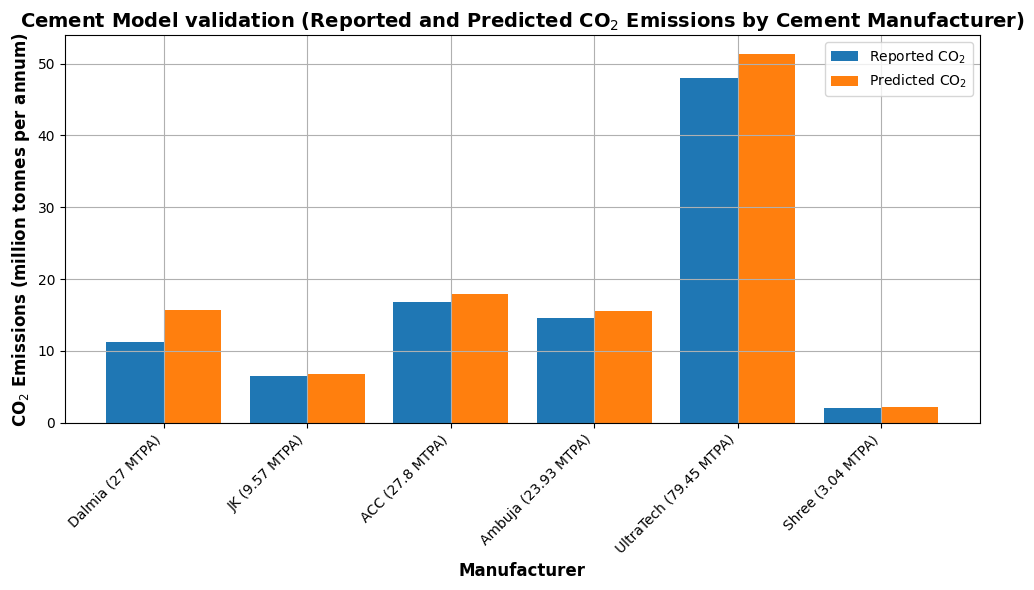

In [ ]:
import matplotlib.pyplot as plt

# Data
industries = ['Dalmia (27 MTPA)', 'JK (9.57 MTPA)', 'ACC (27.8 MTPA)', 'Ambuja (23.93 MTPA)', 'UltraTech (79.45 MTPA)', 'Shree (3.04 MTPA)']
reported_co2 = [11.28, 6.53, 16.77, 14.52, 47.952, 2.03]
predicted_co2 = [15.64, 6.76, 17.97, 15.55, 51.37, 2.13]

# Plotting
x = range(len(industries))
width = 0.4

plt.figure(figsize=(10, 6))
plt.bar(x, reported_co2, width=width, label='Reported CO$_2$')
plt.bar([i + width for i in x], predicted_co2, width=width, label='Predicted CO$_2$')
plt.xlabel('Manufacturer', fontsize = 12, fontweight='bold')
plt.ylabel('CO$_2$ Emissions (million tonnes per annum)', fontsize = 12, fontweight='bold')
plt.title('Cement Model validation (Reported and Predicted CO$_2$ Emissions by Cement Manufacturer)', fontsize=14, fontweight='bold')
plt.legend()
plt.xticks([i + width / 2 for i in x], industries, rotation=45, fontsize=10, ha='right')
plt.grid(True)
plt.tick_params(axis='y', labelsize=10)
plt.tight_layout()
plt.show()